In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from sklearn.decomposition import PCA

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
data = pd.read_csv('../datasets/iris/iris.data',header=None)
data.columns = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species']
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
labels = data.groupby('Species').size().index
values = data.groupby('Species').size()
trace = go.Pie(labels=labels, values=values)
layout = go.Layout(width=200, height=200)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

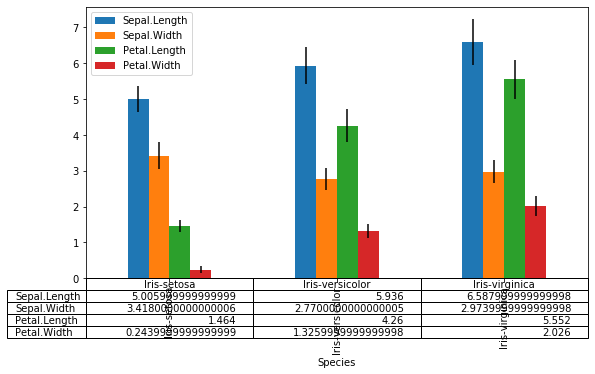

In [6]:
groups= data.groupby(by="Species")
means,sds = groups.mean(),groups.std()
means.plot(yerr=sds,kind='bar',figsize=(9,5),table=True)
plt.show()

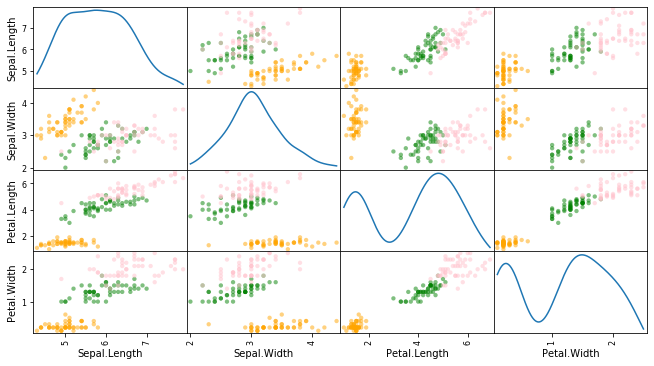

In [15]:
col_map = {'Iris-setosa': 'orange', 'Iris-versicolor': 'green', 'Iris-virginica': 'pink'}
pd.plotting.scatter_matrix(data.loc[:, 'Sepal.Length':'Petal.Width'], diagonal = 'kde', color = [col_map[lb] for lb in data['Species']], s = 75, figsize = (11, 6))
plt.show() 

In [9]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
print("Iris Dataset contains %s samples in total，%s features."%(iris.data.shape[0], iris.data.shape[1]))# 输出为Iris Dataset contains 150 samples in total，4 features.
'''
iris.data[:5]
array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])
iris.target
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
'''
from sklearn.model_selection import train_test_split
X = iris.data[:,:2]
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',solver='newton-cg',multi_class='multinomial')
lr.fit(x_train,y_train)
print("Logistic Regression模型训练集的准确率：%.3f" %lr.score(x_train, y_train))# Logistic Regression模型训练集的准确率：0.829
print("Logistic Regression模型测试集的准确率：%.3f" %lr.score(x_test, y_test))# Logistic Regression模型测试集的准确率：0.822
target_names = ['setosa', 'versicolor', 'virginica']
print(metrics.classification_report(y_test, y_hat, target_names = target_names))
'''
输出为：
precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.81      0.72      0.76        18
  virginica       0.62      0.73      0.67        11

avg / total       0.83      0.82      0.82        45
'''

Iris Dataset contains 150 samples in total，4 features.
Logistic Regression模型训练集的准确率：0.829
Logistic Regression模型测试集的准确率：0.822


NameError: name 'metrics' is not defined